In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pwd

'/Users/dlenz/projects/quickspec_testing/notebooks'

In [3]:
import os
import numpy as np
import pickle as pk
import quickspec as qs

In [4]:
ls = np.arange(20, 4001, 20)
zc = 2.
sigmaz = 2.
b= 0.8 / np.sqrt(2.4)
nonlinear = True

In [5]:
sips = qs.initial_ps(amp=2.2e-9, n_s=0.96, k_pivot=0.05)

In [6]:
sips

In [7]:
lcdm = qs.cosmo.lcdm(omr=0.0, omb=0.049, omc=0.265, oml=0.686, H0=67.3)

In [8]:
vars(lcdm).keys()

dict_keys(['omr', 'omb', 'omc', 'oml', 'H0', 'h', 'omm', 'zvec', 'xvec', 'zmin', 'zmax', 'xmin', 'xmax', 'spl_x_z', 'spl_z_x'])

In [9]:
mps = qs.mps.lin.mps_camb(lcdm, sips, nonlinear=nonlinear)

In [10]:
print(mps.kmin, mps.kmax)
print(mps.zmin, mps.zmax)

6.72327e-07 134.7346
0.0 2048.0


In [11]:
print(mps.kmin, mps.kmax)
print(mps.zmin, mps.zmax)

6.72327e-07 134.7346
0.0 2048.0


In [12]:
mps.arr_k[:5], mps.arr_k[-5:]

(array([  6.73000000e-07,   7.10886473e-07,   7.50905762e-07,
          7.93177933e-07,   8.37829811e-07]),
 array([ 108.11957128,  114.2061526 ,  120.63537746,  127.42653494,  134.6       ]))

In [13]:
nu = 600.e9

In [14]:
klen = qs.lens.kern(lcdm)
kcib = qs.cib.hall.ssed_kern(nu, jbar_kwargs={'zc': zc, 'sigmaz': sigmaz}, b=b)

In [15]:
kcib

In [16]:
cib_cp = np.array([mps.cl_limber_z(l, kcib, klen, zmin=1.e-2, zmax=20.) for l in ls])

In [17]:
cib_cp

array([  5.97079152e-04,   1.85913842e-04,   8.15367830e-05,
         4.17124070e-05,   2.35013912e-05,   1.42393909e-05,
         9.16313771e-06,   6.20746098e-06,   4.39111940e-06,
         3.21784767e-06,   2.42486533e-06,   1.87821008e-06,
         1.46096891e-06,   1.15880498e-06,   9.27222736e-07,
         7.49265806e-07,   6.10661731e-07,   5.01983751e-07,
         4.16250040e-07,   3.48200908e-07,   2.93837019e-07,
         2.48182984e-07,   2.14515311e-07,   1.85314416e-07,
         1.61071815e-07,   1.40795429e-07,   1.23622191e-07,
         1.08646363e-07,   9.63960512e-08,   8.55184734e-08,
         7.61013589e-08,   6.79078219e-08,   6.07834668e-08,
         5.43396629e-08,   4.90718444e-08,   4.43420438e-08,
         4.01492823e-08,   3.64584260e-08,   3.32009457e-08,
         3.03899448e-08,   2.76057696e-08,   2.54267951e-08,
         2.33579148e-08,   2.15054992e-08,   1.97947797e-08,
         1.82849436e-08,   1.70294192e-08,   1.57937964e-08,
         1.45799094e-08,

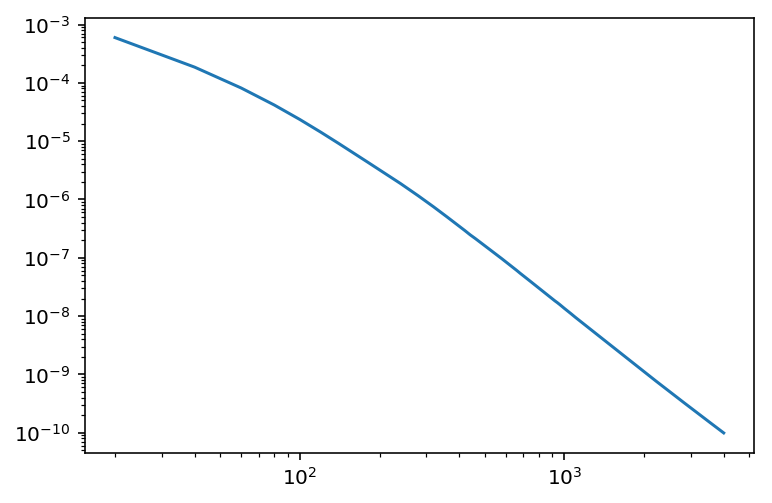

In [18]:
plt.loglog(ls, cib_cp)

In [19]:
cib_cc = np.array([mps.cl_limber_z(l, kcib, zmin=1.e-2, zmax=20.) for l in ls])

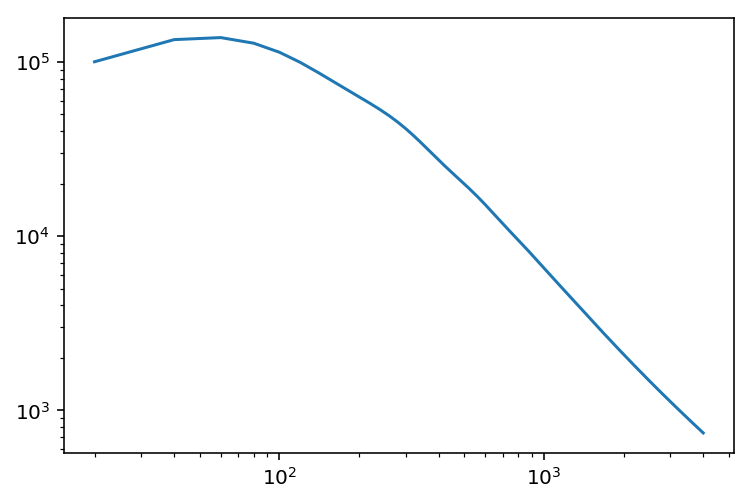

In [20]:
plt.loglog(ls, cib_cc)

In [21]:
cib_pp = np.array([mps.cl_limber_z(l, klen, zmin=1.e-2, zmax=20.) for l in ls])

[]

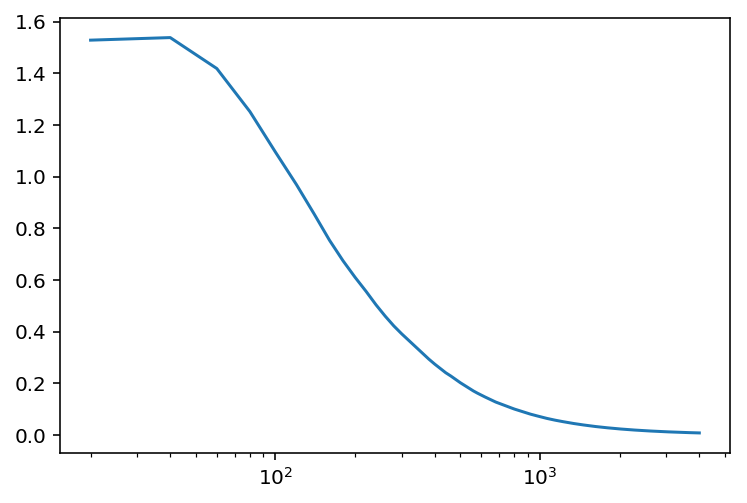

In [22]:
plt.plot(ls, (ls * (ls + 1.))**2. / 2. / np.pi * cib_pp * 1.e7)
plt.semilogx()

In [5]:
def get_cl_cib_hall(nu, ls=np.arange(20, 4001, 20), zc=2., sigmaz=2., b=0.8 / np.sqrt(2.4), nonlinear=True):
    '''
    the same of get_cl_cib but it save the cls if you need them later
    '''

    cib_dir = 'cib/'
    if not os.path.exists(cib_dir):
        os.mkdir(cib_dir)
    cib_name = os.path.join(cib_dir, 'cib')
        
    # get spectra
    sips = qs.initial_ps(amp=2.2e-9, n_s=0.96, k_pivot=0.05)
    lcdm = qs.cosmo.lcdm(omr=0.0, omb=0.049, omc=0.265, oml=0.686, H0=67.3)
    mps = qs.mps.lin.mps_camb(lcdm, sips, nonlinear=nonlinear)
    klen = qs.lens.kern(lcdm)
    kcib = qs.cib.hall.ssed_kern(nu, jbar_kwargs={'zc': zc, 'sigmaz': sigmaz}, b=b)

    cib_cp = np.array([mps.cl_limber_z(l, kcib, klen, zmin=1.e-2, zmax=20.) for l in ls])
    cib_cc = np.array([mps.cl_limber_z(l, kcib, zmin=1.e-2, zmax=20.) for l in ls])
    cib_pp = np.array([mps.cl_limber_x(l, klen, xmax=klen.xlss) for l in ls])

    pk.dump((cib_cc, cib_cp, cib_pp), open(fname, 'w'))
    return pk.load(open(fname, 'r'))

In [31]:
def get_cl_cib(nu, ls=np.arange(20, 4001, 20), zc=2., sigmaz=2., b=1.0 / np.sqrt(2.4), nonlinear=True):
    '''
    This is a wrapper of D. Hanson quickspec that computes CIB power spectra given a theory.

    It uses the Hall model for the CIB. You can do this with Eisenstein hu or you have to interface pycamb somehow
    TODO maybe add a way to pass CAMB matter power and that is it.

    INPUT:
    lam: lambda, wavelenght of the CIB model 250,350 or 500 possible in this case



    OUTPUT:

        cib_cp = C^phi-cib
        cib_pp =C^phi
        cib_cc = C^cib
    '''
    # get spectra
    sips = qs.initial_ps(amp=2.2e-9, n_s=0.96, k_pivot=0.05)
    lcdm = qs.cosmo.lcdm(omr=0.0, omb=0.049, omc=0.265, oml=0.686, H0=67.3)
    mps = qs.mps.lin.mps_camb(lcdm, sips, nonlinear=nonlinear)
    klen = qs.lens.kern(lcdm)
    kcib = qs.cib.hall.ssed_kern(nu, jbar_kwargs={'zc': zc, 'sigmaz': sigmaz}, b=b)

    cib_cp = np.array([mps.cl_limber_z(l, kcib, klen, zmin=1.e-2, zmax=20.) for l in ls])
    cib_cc = np.array([mps.cl_limber_z(l, kcib, zmin=1.e-2, zmax=20.) for l in ls])
    cib_pp = np.array([mps.cl_limber_z(l, klen, zmin=1.e-2, zmax=20.) for l in ls])

    return (cib_cc, cib_cp, cib_pp)

In [32]:
ls = 1. * np.arange(20, 4001, 20)

# get the power spectra from Duncan quickspec                                                                                                                     
cc, cp, pp = get_cl_cib(600.e9, ls=ls, b=0.5)

In [36]:
# CMBlens auto, in convergence kappa
lmax_cib=4000.
clpp = np.interp(np.arange(0, lmax_cib), ls, pp * ls**4, left=0, right=0) * np.nan_to_num(1. / np.arange(0., lmax_cib)**4)

/Users/dlenz/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


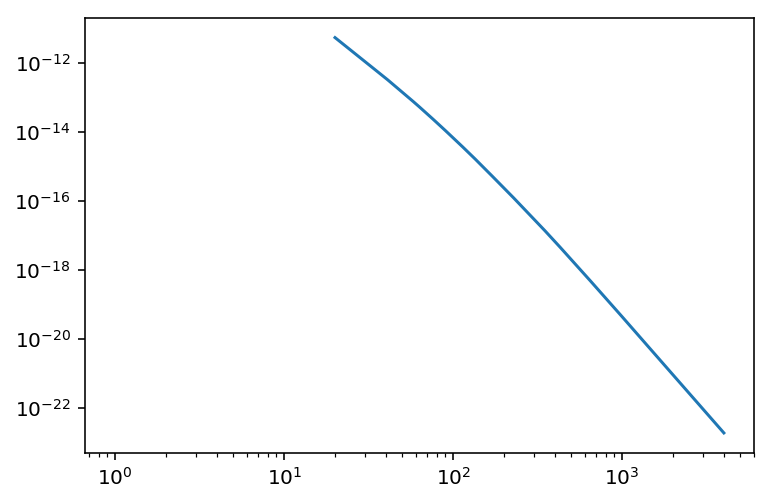

In [40]:
plt.loglog(clpp)